In [11]:
import pandas as pd
emobase1 = pd.read_csv('/home/zlh/gabor/emobase1.csv',header=None)
modma_features = pd.read_csv('/home/zlh/gabor/feature csv/selected_features.csv',header=None)
daic_features = pd.read_csv('/home/zlh/gabor/feature csv/DAIC_selected_features.csv',header=None)


In [12]:
daic_features

,0
0,lspFreq_sma_de[7]_maxPos
1,mfcc_sma[7]_maxPos
2,lspFreq_sma[4]_minPos
3,lspFreq_sma[2]_minPos
4,mfcc_sma_de[9]_maxPos
...,...
519,mfcc_sma_de[1]_linregc1
520,lspFreq_sma[3]_linregerrQ
521,lspFreq_sma[7]_linregerrQ
522,lspFreq_sma_de[0]_quartile1


In [13]:
set1 = set(emobase1[0])
set2 = set(modma_features[0])
set3 = set(daic_features[0])

In [16]:
# 判断集合之间的包含关系
relations = {
    'set1_subset_set2': set1.issubset(set2),
    'set2_subset_set1': set2.issubset(set1),
    'set1_subset_set3': set1.issubset(set3),
    'set3_subset_set1': set3.issubset(set1),
    'set2_subset_set3': set2.issubset(set3),
    'set3_subset_set2': set3.issubset(set2),
}

AttributeError: 'NoneType' object has no attribute 'get_facecolor'

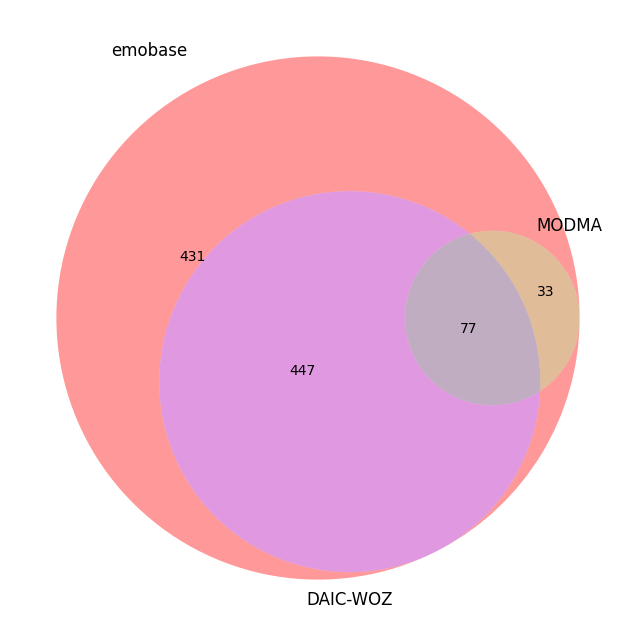

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# 创建Venn图，显示三个集合的交集
plt.figure(figsize=(8, 8))
venn = venn3([set1, set2, set3], set_labels=('emobase', 'MODMA', 'DAIC-WOZ'))

# 为各个交集部分添加标签
# venn.get_label_by_id('100').set_text(f'emobase only: {len(set1 - set2 - set3)}')
# # venn.get_label_by_id('010').set_text(f'Set 2 only: {len(set2 - set1 - set3)}')
# # venn.get_label_by_id('001').set_text(f'Set 3 only: {len(set3 - set1 - set2)}')
# venn.get_label_by_id('110').set_text(f'emobase & MODMA: {len(set1 & set2 - set3)}')
# venn.get_label_by_id('101').set_text(f'emobase & DAIC-WOZ: {len(set1 & set3 - set2)}')
# venn.get_label_by_id('011').set_text(f'MODMA & DAIC-WOZ: {len(set2 & set3 - set1)}')
# venn.get_label_by_id('111').set_text(f'All three sets: {len(set1 & set2 & set3)}')
# 获取每个圆形区域的颜色
patches = venn.patches

# 设置图例，显示每种颜色对应的集合
# 使用字典来指定每个集合的颜色
colors = {
    'emobase': patches[0].get_facecolor(),  # Set 1的颜色
    'MODMA': patches[1].get_facecolor(),  # Set 2的颜色
    'DAIC-WOZ': patches[2].get_facecolor()   # Set 3的颜色
}

# 创建图例
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors.values()]
labels = list(colors.keys())

# 将图例显示在右上角
plt.legend(handles, labels, loc='upper right', title="Feature Sets")
# 设置标题
plt.title('Venn Diagram Showing Feature Set Containment and Intersection')
plt.savefig("/home/zlh/gabor/feature csv/venn.png", bbox_inches='tight', dpi=300)
